### IDs:
Insert yours IDs to the cell below

ID #1: 203958103

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [30]:
from scipy.stats import nbinom
def n_for_qkp(q,k,p):
    x = nbinom.ppf(q,k,p,loc=k)
    return int(x)
print(n_for_qkp(0.85,1,0.03))

63


/Users/rotemweissman/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:339: RuntimeWarning: overflow encountered in _nbinom_ppf
  return _boost._nbinom_ppf(q, n, p)


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [47]:
print(n_for_qkp(0.95,1,0.04))

74


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [31]:
r = [5,15]
p = [0.1,0.3]
q = [0.9,0.9]
l = zip(r,p,q)

for r,p,q in l:
    print(f"{q*100}% probability of {r} successes, under p={p*100}% requires a batch of {n_for_qkp(q,r,p)}")

90.0% probability of 5 successes, under p=10.0% requires a batch of 78
90.0% probability of 15 successes, under p=30.0% requires a batch of 64


/Users/rotemweissman/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:339: RuntimeWarning: overflow encountered in _nbinom_ppf
  return _boost._nbinom_ppf(q, n, p)


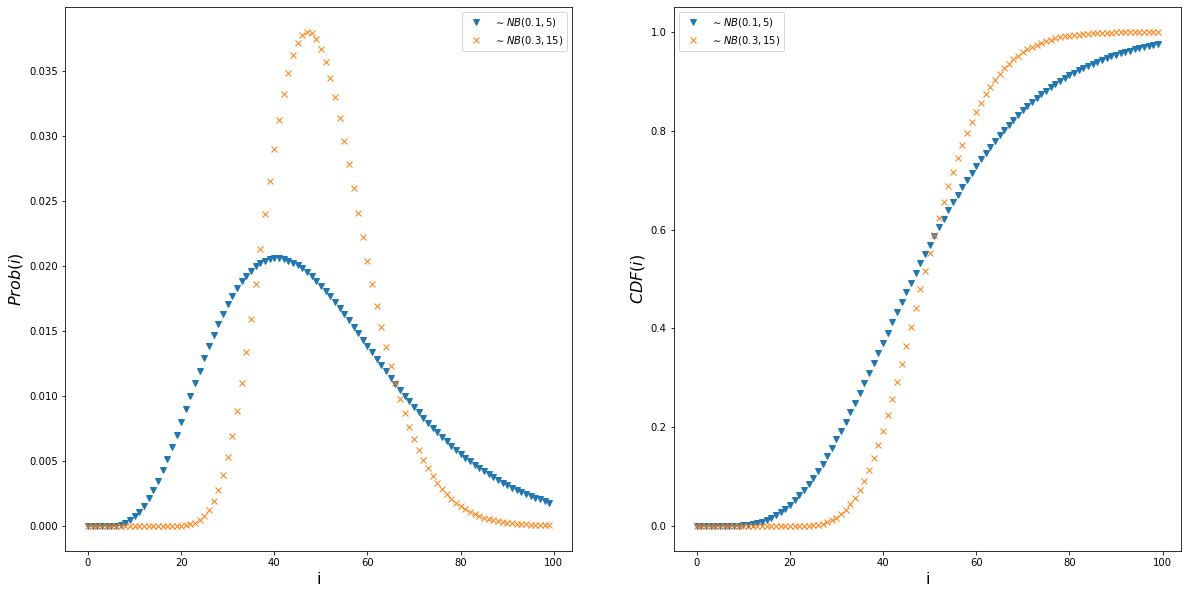

In [61]:
r1 = 5
p1 = 0.1
r2 = 15
p2 = 0.3

X1 = nbinom(r1,p1,loc=r1)
X2 = nbinom(r2,p2,loc=r2)

i1 = range(0,int(np.round(2*r1/p1,0)))
i2 = range(0,int(np.round(2*r2/p2,0)))

pmf_X1_i = X1.pmf([xx for xx in i1])
pmf_X2_i = X2.pmf([xx for xx in i1])
cdf_X1_i = X1.cdf([xx for xx in i1])
cdf_X2_i = X2.cdf([xx for xx in i1])

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(i1, pmf_X1_i,'v',label="$\sim NB({{{0}}},{{{1}}})$".format(p1,r1))
plt.plot(i1, pmf_X2_i,'x',label="$\sim NB({{{0}}},{{{1}}})$".format(p2,r2))
plt.xlabel("i",fontsize=16)
plt.ylabel('$Prob(i)$',fontsize=16)
plt.legend()

plt.subplot(1,2,2)
plt.plot(i1, cdf_X1_i,'v',label="$\sim NB({{{0}}},{{{1}}})$".format(p1,r1))
plt.plot(i1, cdf_X2_i,'x',label="$\sim NB({{{0}}},{{{1}}})$".format(p2,r2))
plt.xlabel("i",fontsize=16)
plt.ylabel('$CDF(i)$',fontsize=16)
plt.legend()

The expected value $E(Y)$ is the same for both of the samples:
$\newline E(Y) = \frac{5}{0.1} = \frac{15}{0.3} = 50\newline$
But, the variance of sample one is larger, therefore, in order to achieve 90% confidance we need more tries.
$\newline V(5,0.1)=\frac{5(1-0.1)}{0.1^2}=450$
$\newline V(15,0.3)=\frac{15(1-0.3)}{0.3^2}=116.67$

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [3]:
from scipy.stats import moment
n = 20
p = [0.2,0.1,0.1,0.1,0.2,0.3]
k = 100

rng = np.random.default_rng()
X = rng.multinomial(n,p,size=k)
X2_X3_X4 = X[:,1:4]
Y = X2_X3_X4.sum(axis=1)

print(moment(Y, moment=3, axis=0)) # same as (((Y-Y.mean())**3).sum()/k)

2.6210220000000017


We can relate to Y as:$Y\sim Binom(20,0.3)\newline$
beacuse that $P(X_2)+P(X_3)+P(X_4)=0.1+0.1+0.1\newline$
In the class we defined $\gamma_3 = np(1-p)(1-2p)\newline$
So in this case: $\gamma_3 = 20*0.3*(1-0.3)*(1-2*0.3)\newline$
$\gamma_3 = 6*(0.7)*(0.4) = 1.68\newline$

The diferent lies in the fact that the sample of k=100 is not large enough. When we take k=100,000, then the result is much similiar to the theoretical one.

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

$V(X_1+...+X_n)=\sum_{i=1}^{n}V(X_i)+\sum_{(i,j|j\neq i)}Cov(X_i,X_j)$

$V(X+Y+Z)=V(X)+V(Y)+V(Z)+2Cov(X,Y)+2Cov(X,Z)+2Cov(Y,Z)\newline$
If X,Y,Z are pairwise independant, then the covariance of each pair is 0. Therefore:
$\newline V(X+Y+Z)=V(X)+V(Y)+V(Z)\newline$
Pairwise independant does not imply collective independance, as in the following example:

Let X and Y be two independent Bernoulli varibles with $p=0.5$
Let $Z=XOR(X,Y)$

In this case Z is depandant of X,Y but X and Y are independant of each other

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [20]:
def NFoldConv(P,n):  # P is a Dataframe of features "values" and "prob" (probalitities)
    values = P['values'].values
    probs = P['probs'].values
    init_vals = values
    init_probs = probs

    for i in range(n-1):
        values = np.add.outer(values, init_vals).flatten()
        probs = np.multiply.outer(probs, init_probs).flatten()
        Q = pd.DataFrame({'values':values,'probs':probs}).groupby('values').agg('sum')
        Q.reset_index(inplace=True)
        values, probs = Q['values'].values, Q['probs'].values

    return Q

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [21]:
probalities = np.ones(8)/8
values = np.linspace(1,8,8)

df1 = pd.DataFrame({'values':values, 'probs':probalities})

NFoldConv(df1,17)

,values,probs
0,17.0,4.440892e-16
1,18.0,7.549517e-15
2,19.0,6.794565e-14
3,20.0,4.303224e-13
4,21.0,2.151612e-12
...,...,...
115,132.0,2.151612e-12
116,133.0,4.303224e-13
117,134.0,6.794565e-14
118,135.0,7.549517e-15


### Question 6 - Counting Similar Strings

Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 6.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

#### 6.B
State a formula for comuting $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

#### 6.C 
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$. 

#### 6.D
Use a scatter plot to compare the empirical and the computed values from the previous section